# Commune data analysis and json-export

In this notebook we load the data for naturalizations, naturalizations per capita and population for all communes for the years 1981 to 2015. We perform some analysis and add geoinformation to this data.

The output of this notebook is:
* A json array with absolute naturlization timeseries for all communes - `einbTimechart.js` 
* A json array representing a histogram of relative naturalization ratios across communes - `einbCapitaHist.js` 
* A json array with the cumulated relative naturalization ratios for each commune - `einbCapitaBarchart.js`
* A set of maps, where each map shows a class in the above histogram of relative naturalization ratios - `map/map0.png`

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
import geopandas as gpd

In [235]:
from shapely.geometry import Point

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [46]:
pd.set_option('display.max_columns', 100)

In [261]:
pd.set_option("display.float_format", "{:,.2f}".format) 

In [5]:
startyear = 1981
endyear = 2015

## Load the data

In [6]:
#Citizenships
df_einb = pd.read_csv('CleanerData/Gem-Einb-Wide-1981-2015.csv')
df_einb.head(2)

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2013,2014,2015,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name
0,1,0,1,3,0,6,2,2,1,0,...,11,8,10,1,Aeugst am Albis,ZH,101,Affoltern,1,Zürich
1,13,37,14,33,15,18,16,14,15,12,...,83,49,55,2,Affoltern am Albis,ZH,101,Affoltern,1,Zürich


In [7]:
df_einb.shape

(2324, 42)

In [8]:
#Population Levels
df_bev = pd.read_csv('CleanerData/Gem-Bev-Wide-1981-2015.csv')
df_bev.head(2)

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2013,2014,2015,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name
0,867.0,905.0,945.0,958.0,969.0,1008.0,1000.0,1043.0,1104.0,1144.0,...,1955.0,1972.0,1959.0,1,Aeugst am Albis,ZH,101,Affoltern,1,Zürich
1,8041.0,8223.0,8281.0,8422.0,8629.0,8699.0,8827.0,8958.0,9101.0,9314.0,...,11276.0,11363.0,11552.0,2,Affoltern am Albis,ZH,101,Affoltern,1,Zürich


In [262]:
#Citizenships per capita
df_einb_capita = pd.read_csv('CleanerData/Gem-EinbCap-Wide-1981-2015.csv')
df_einb_capita.head(2)

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average
0,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,1,Aeugst am Albis,ZH,101,Affoltern,1,Zürich,0.07,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,2,Affoltern am Albis,ZH,101,Affoltern,1,Zürich,0.17,0.00


## Load the Geodata

In [10]:
#This shapefile is for the communes
gdf = gpd.read_file('shp/g1g15.shp')
gdf.head(2)

,AREA_HA,BZNR,GMDNAME,GMDNR,GRNR,KTNR,OBJECTID,Shape_Area,Shape_Leng,X_CNTR,...,X_MIN,Y_CNTR,Y_MAX,Y_MIN,Z_AVG,Z_CNTR,Z_MAX,Z_MED,Z_MIN,geometry
0,791,101,Aeugst am Albis,1,4,1,1,7.945775e+06,12833.889364,679300,...,678110,235700,238544,234561,684,700,886,673,532,"POLYGON ((680805.25 237763.620000001, 681154.0..."
1,1059,101,Affoltern am Albis,2,4,1,2,1.057995e+07,18747.490903,676800,...,673825,236800,239339,235208,529,490,749,502,440,"POLYGON ((678521.9299999997 238539.8399999999,..."


In [11]:
gdf.shape

(2328, 21)

In [243]:
#One for the cantons
gdf_cantons = gpd.read_file('shp/g1k15.shp')
gdf_cantons.head(2)

,AREA_HA,GRNR,KTNAME,KTNR,X_CNTR,X_MAX,X_MIN,Y_CNTR,Y_MAX,Y_MIN,Z_AVG,Z_MAX,Z_MED,Z_MIN,geometry
0,172895,4,Zürich,1,691800,716900,669244,252000,283343,223896,533,1290,504,331,"POLYGON ((692429.2012999989 281173.7074999996,..."
1,595956,2,Bern / Berne,2,614200,677745,556241,185600,243834,130585,1198,4269,979,399,(POLYGON ((573502.2038000003 194804.7199999988...


## Add some info

In [12]:
#Calculate the total
def totals(row):
    total = 0
    for year in range(startyear, endyear + 1):
        total += row[str(year)]
    return total

In [13]:
#Calculate the average
def averages(row):
    total = 0
    for year in range(startyear, endyear + 1):
        total += row[str(year)]
    average = total / len(range(startyear, endyear + 1))
    return average

In [30]:
#Calculate the percent change
def change(row):
    if row[str(startyear)] == 0:
        return np.nan
    else:
        return row[str(endyear)] / row[str(startyear)] - 1

In [31]:
df_einb['Total'] = df_einb.apply(totals, axis=1)
df_einb['Average'] = df_einb.apply(averages, axis=1)
df_einb['Change'] = df_einb.apply(change, axis=1)
df_einb.head(2)

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average,Change
0,1,0,1,3,0,6,2,2,1,0,...,1,Aeugst am Albis,ZH,101,Affoltern,1,Zürich,113,3.228571,9.000000
1,13,37,14,33,15,18,16,14,15,12,...,2,Affoltern am Albis,ZH,101,Affoltern,1,Zürich,1704,48.685714,3.230769


In [47]:
df_bev['Total'] = df_bev.apply(totals, axis=1)
df_bev['Average'] = df_bev.apply(averages, axis=1)
df_bev['Change'] = df_bev.apply(change, axis=1)
df_bev.head(2)

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average,Change
0,867.0,905.0,945.0,958.0,969.0,1008.0,1000.0,1043.0,1104.0,1144.0,1203.0,1236.0,1290.0,1317.0,1351.0,1386.0,1431.0,1447.0,1455.0,1513.0,1517.0,1494.0,1490.0,1541.0,1602.0,1617.0,1645.0,1704.0,1700.0,1740.0,1824.0,1910.0,1955.0,1972.0,1959.0,1,Aeugst am Albis,ZH,101,Affoltern,1,Zürich,49242.0,1406.914286,1.259516
1,8041.0,8223.0,8281.0,8422.0,8629.0,8699.0,8827.0,8958.0,9101.0,9314.0,9053.0,9127.0,9227.0,9226.0,9245.0,9351.0,9451.0,9480.0,9551.0,9744.0,9918.0,10049.0,10153.0,10246.0,10166.0,10176.0,10302.0,10410.0,10630.0,10735.0,11091.0,11160.0,11276.0,11363.0,11552.0,2,Affoltern am Albis,ZH,101,Affoltern,1,Zürich,339177.0,9690.771429,0.436637


In [263]:
df_einb_capita['Total'] = df_einb_capita.apply(totals, axis=1)
df_einb_capita['Average'] = df_einb_capita.apply(averages, axis=1)
df_einb_capita['Change'] = df_einb_capita.apply(change, axis=1)
df_einb_capita.head(2)

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average,Change
0,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,1,Aeugst am Albis,ZH,101,Affoltern,1,Zürich,0.07,0.00,3.43
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,2,Affoltern am Albis,ZH,101,Affoltern,1,Zürich,0.17,0.00,1.94


## Merge with Geodata

In [111]:
#Citizenships
gdf_einb = gdf.merge(df_einb, how='inner', left_on='GMDNR', right_on='Gemeinde_ID')
gdf_einb.head(2)

,AREA_HA,BZNR,GMDNAME,GMDNR,GRNR,KTNR,OBJECTID,Shape_Area,Shape_Leng,X_CNTR,X_MAX,X_MIN,Y_CNTR,Y_MAX,Y_MIN,Z_AVG,Z_CNTR,Z_MAX,Z_MED,Z_MIN,geometry,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average,Change
0,791,101,Aeugst am Albis,1,4,1,1,7.945775e+06,12833.889364,679300,681154,678110,235700,238544,234561,684,700,886,673,532,"POLYGON ((680805.25 237763.620000001, 681154.0...",1,0,1,3,0,6,2,2,1,0,0,1,1,1,2,0,1,0,2,2,1,1,1,0,2,3,7,10,8,4,15,6,11,8,10,1,Aeugst am Albis,ZH,101,Affoltern,1,Zürich,113,3.228571,9.000000
1,1059,101,Affoltern am Albis,2,4,1,2,1.057995e+07,18747.490903,676800,678583,673825,236800,239339,235208,529,490,749,502,440,"POLYGON ((678521.9299999997 238539.8399999999,...",13,37,14,33,15,18,16,14,15,12,6,24,16,15,31,24,24,34,33,41,56,71,74,87,66,137,122,150,109,106,49,55,83,49,55,2,Affoltern am Albis,ZH,101,Affoltern,1,Zürich,1704,48.685714,3.230769


In [264]:
#Citizenshps per capita
gdf_einb_capita = gdf.merge(df_einb_capita, how='inner', left_on='GMDNR', right_on='Gemeinde_ID')
gdf_einb_capita.head(2)

,AREA_HA,BZNR,GMDNAME,GMDNR,GRNR,KTNR,OBJECTID,Shape_Area,Shape_Leng,X_CNTR,X_MAX,X_MIN,Y_CNTR,Y_MAX,Y_MIN,Z_AVG,Z_CNTR,Z_MAX,Z_MED,Z_MIN,geometry,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average,Change
0,791,101,Aeugst am Albis,1,4,1,1,"7,945,775.27","12,833.89",679300,681154,678110,235700,238544,234561,684,700,886,673,532,"POLYGON ((680805.25 237763.620000001, 681154.0...",0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,1,Aeugst am Albis,ZH,101,Affoltern,1,Zürich,0.07,0.00,3.43
1,1059,101,Affoltern am Albis,2,4,1,2,"10,579,952.77","18,747.49",676800,678583,673825,236800,239339,235208,529,490,749,502,440,"POLYGON ((678521.9299999997 238539.8399999999,...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,2,Affoltern am Albis,ZH,101,Affoltern,1,Zürich,0.17,0.00,1.94


## Helper functions

In [27]:
def plot_timeseries(df, label='', size_x=10, size_y=10):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    for i in df.index:
        years = []
        series = []
        for year in range(startyear, endyear + 1):
            years.append(year)
            series.append(df.loc[i, str(year)])
        df_test = pd.DataFrame(series, years)
        df_test.rename(columns={0: df.loc[i, label]}, inplace=True)
        df_test.plot(ax=ax)

## Overview absolute numbers

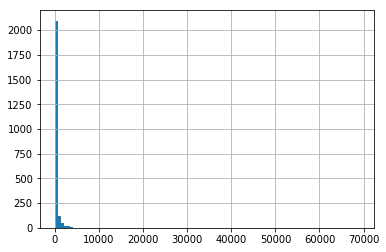

In [20]:
#Here's a histogram of how many citizenships were given
#Obviously this is very one-sided
df_einb['Total'].hist(bins=100)

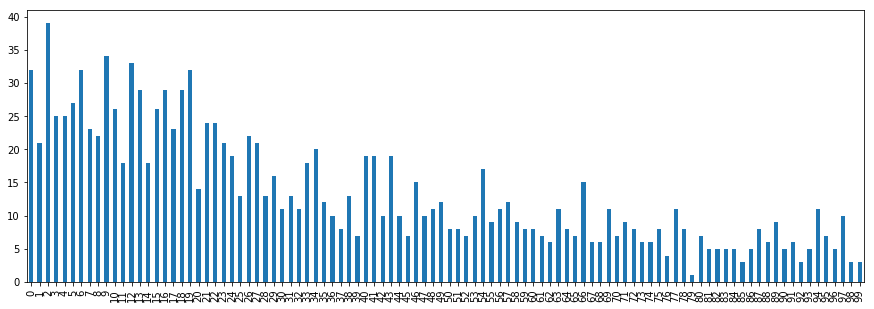

In [21]:
#Here's a closer look at the number of communes who handed out between 0 and 100 citizenships
df_einb['Total'].value_counts().sort_index().head(100).plot(kind='bar', figsize=(15,5))

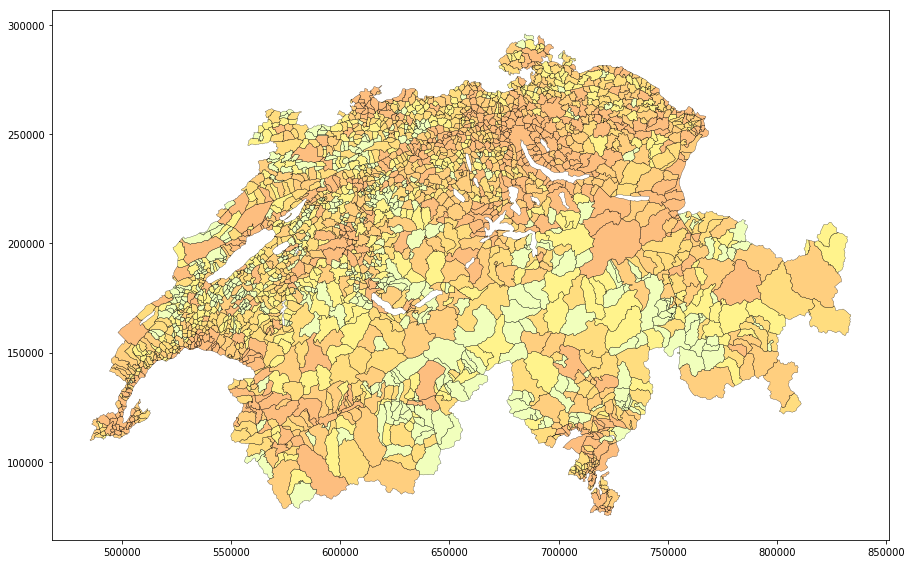

In [78]:
## A geographical image of the total number of handed out citizenhships btw 1981 and 2015
## This reflects mostly population size

gdf_einb.plot(column='Total', scheme='quantiles', cmap='Wistia', figsize=(15,10), linewidth=0.25)

## Absolute naturalization numbers - this material for linechart on page 1

In [115]:
#We make a copy of the dataframe to make sure nothing gets messed up
df_einb_exp = df_einb.copy()

In [119]:
#This helper function takes all the year-columns and puts them as a list into one single column
def timeseries_list(row):
    timeseries = []
    for year in range(startyear, endyear + 1):
        timeseries.append(row[str(year)])
    return timeseries

In [123]:
#Call the function
df_einb_exp['data'] = df_einb_exp.apply(timeseries_list, axis=1)
df_einb_exp.head(2)

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average,Change,data
0,1,0,1,3,0,6,2,2,1,0,0,1,1,1,2,0,1,0,2,2,1,1,1,0,2,3,7,10,8,4,15,6,11,8,10,1,Aeugst am Albis,ZH,101,Affoltern,1,Zürich,113,3.228571,9.000000,"[1, 0, 1, 3, 0, 6, 2, 2, 1, 0, 0, 1, 1, 1, 2, ..."
1,13,37,14,33,15,18,16,14,15,12,6,24,16,15,31,24,24,34,33,41,56,71,74,87,66,137,122,150,109,106,49,55,83,49,55,2,Affoltern am Albis,ZH,101,Affoltern,1,Zürich,1704,48.685714,3.230769,"[13, 37, 14, 33, 15, 18, 16, 14, 15, 12, 6, 24..."


In [124]:
#Get rid of all the year-columns we don't need
for year in range(startyear, endyear + 1):
    df_einb_exp.pop(str(year))
df_einb_exp.head(2)

,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average,Change,data
0,1,Aeugst am Albis,ZH,101,Affoltern,1,Zürich,113,3.228571,9.000000,"[1, 0, 1, 3, 0, 6, 2, 2, 1, 0, 0, 1, 1, 1, 2, ..."
1,2,Affoltern am Albis,ZH,101,Affoltern,1,Zürich,1704,48.685714,3.230769,"[13, 37, 14, 33, 15, 18, 16, 14, 15, 12, 6, 24..."


In [130]:
#Getting ready to export to a file
json_einb_timechart = df_einb_exp.set_index('Gemeinde_ID').to_json(orient='index', double_precision=1)
json_einb_timechart

In [131]:
with open('web/json/einbTimechart.js', 'w') as f:
    f.write('var einbTimechartData = ' + json_einb_timechart)  

### Add-on: An HTML generator to populate the search box (speed things up)

In [284]:
df_einb_exp.head(2)

,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average,Change,data
0,1,Aeugst am Albis,ZH,101,Affoltern,1,Zürich,113,3.23,9.00,"[1, 0, 1, 3, 0, 6, 2, 2, 1, 0, 0, 1, 1, 1, 2, ..."
1,2,Affoltern am Albis,ZH,101,Affoltern,1,Zürich,1704,48.69,3.23,"[13, 37, 14, 33, 15, 18, 16, 14, 15, 12, 6, 24..."


In [310]:
#A function to create a single option entry
def make_options(row):
    string = '<option value="' + str(row['Gemeinde_ID']) + '">' + row['Gemeinde_Name'] + '</option>'
    return string

In [321]:
#Call the function for each row
options = df_einb_exp.apply(make_options, axis=1)
options_string = options.sum()
options_string = options_string.replace("\'", "&lsquo;")
options_string

'<option value="1">Aeugst am Albis</option><option value="2">Affoltern am Albis</option><option value="3">Bonstetten</option><option value="4">Hausen am Albis</option><option value="5">Hedingen</option><option value="6">Kappel am Albis</option><option value="7">Knonau</option><option value="8">Maschwanden</option><option value="9">Mettmenstetten</option><option value="10">Obfelden</option><option value="11">Ottenbach</option><option value="12">Rifferswil</option><option value="13">Stallikon</option><option value="14">Wettswil am Albis</option><option value="21">Adlikon</option><option value="22">Benken (ZH)</option><option value="23">Berg am Irchel</option><option value="24">Buch am Irchel</option><option value="25">Dachsen</option><option value="26">Dorf</option><option value="27">Feuerthalen</option><option value="28">Flaach</option><option value="29">Flurlingen</option><option value="30">Andelfingen</option><option value="31">Henggart</option><option value="32">Humlikon</option><opt

In [322]:
#We will copy this string by hand into the html :-D
with open('web/searchOptions.js', 'w') as f:
    f.write("var searchOptions = '" + options_string + "';")

## Overview relative numbers - this will be used in the barchart on page 2

In [233]:
df_einb_capita['Total'].mean()

0.071415958489082554

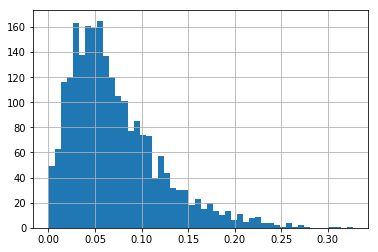

In [184]:
#Here's a histogram of how many citizenships were given, by capita
#On average, Swiss communes gave a total no of new citizenships since 1981 that corresponds to about 5% of their size
df_einb_capita['Total'].hist(bins=50)

In [216]:
#Another way to do the histogram (almost correct)
einb_capita_hist = (df_einb_capita['Total'] * 100).round(0).value_counts().sort_index().to_frame()

In [217]:
#Fill some missing zeroes
einb_capita_hist.loc[29, "Total"] = 0
einb_capita_hist.loc[32, "Total"] = 0

In [219]:
pd.set_option("display.float_format", "{:,.0f}".format) 

In [220]:
#Sort according to the index (i.e. the histogram bins)
einb_capita_hist = einb_capita_hist.sort_index()
einb_capita_hist.head(2)

,Total
0,41
1,104
2,181
3,227
4,234
5,243
6,235
7,182
8,151
9,121


In [228]:
#We are preparing to export this
json_einb_capita_hist = einb_capita_hist.reset_index().to_dict(orient='list')
str(json_einb_capita_hist)

In [232]:
with open('web/json/einbCapitaHist.js', 'w') as f:
    f.write('var einbCapitaHistData = ' + str(json_einb_capita_hist))  

## Citizenships per capita - this is also used for barchart on page 2

In [181]:
df_einb_capita_barchart = df_einb_capita[['Gemeinde_ID', 'Gemeinde_Name', 'Total']]
df_einb_capita_barchart['Total'] = df_einb_capita_barchart['Total'] * 100
df_einb_capita_barchart.head(2)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Gemeinde_ID,Gemeinde_Name,Total
0,1,Aeugst am Albis,7.172314
1,2,Affoltern am Albis,16.881226


In [182]:
json_einb_capita_barchart = df_einb_capita_barchart.set_index('Gemeinde_ID').to_json(orient='index', double_precision=1)
json_einb_capita_barchart

'{"1":{"Gemeinde_Name":"Aeugst am Albis","Total":7.2},"2":{"Gemeinde_Name":"Affoltern am Albis","Total":16.9},"3":{"Gemeinde_Name":"Bonstetten","Total":10.3},"4":{"Gemeinde_Name":"Hausen am Albis","Total":9.0},"5":{"Gemeinde_Name":"Hedingen","Total":12.3},"6":{"Gemeinde_Name":"Kappel am Albis","Total":5.8},"7":{"Gemeinde_Name":"Knonau","Total":6.0},"8":{"Gemeinde_Name":"Maschwanden","Total":4.3},"9":{"Gemeinde_Name":"Mettmenstetten","Total":8.3},"10":{"Gemeinde_Name":"Obfelden","Total":12.0},"11":{"Gemeinde_Name":"Ottenbach","Total":7.8},"12":{"Gemeinde_Name":"Rifferswil","Total":3.9},"13":{"Gemeinde_Name":"Stallikon","Total":10.3},"14":{"Gemeinde_Name":"Wettswil am Albis","Total":10.7},"21":{"Gemeinde_Name":"Adlikon","Total":7.3},"22":{"Gemeinde_Name":"Benken (ZH)","Total":6.0},"23":{"Gemeinde_Name":"Berg am Irchel","Total":5.2},"24":{"Gemeinde_Name":"Buch am Irchel","Total":3.4},"25":{"Gemeinde_Name":"Dachsen","Total":6.6},"26":{"Gemeinde_Name":"Dorf","Total":9.2},"27":{"Gemeinde_Nam

In [183]:
with open('web/json/einbCapitaBarchart.js', 'w') as f:
    f.write('var einbCapitaBarchartData = ' + json_einb_capita_barchart)  

## Put the per capita numbers on the map - will be used on page 3

In [265]:
#This is for the slideshow!
#First, we make a copy of the gdf
gdf_einb_capita_points = gdf_einb_capita.copy()
gdf_einb_capita_points.head(2)

,AREA_HA,BZNR,GMDNAME,GMDNR,GRNR,KTNR,OBJECTID,Shape_Area,Shape_Leng,X_CNTR,X_MAX,X_MIN,Y_CNTR,Y_MAX,Y_MIN,Z_AVG,Z_CNTR,Z_MAX,Z_MED,Z_MIN,geometry,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average,Change
0,791,101,Aeugst am Albis,1,4,1,1,"7,945,775.27","12,833.89",679300,681154,678110,235700,238544,234561,684,700,886,673,532,"POLYGON ((680805.25 237763.620000001, 681154.0...",0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,1,Aeugst am Albis,ZH,101,Affoltern,1,Zürich,0.07,0.00,3.43
1,1059,101,Affoltern am Albis,2,4,1,2,"10,579,952.77","18,747.49",676800,678583,673825,236800,239339,235208,529,490,749,502,440,"POLYGON ((678521.9299999997 238539.8399999999,...",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,2,Affoltern am Albis,ZH,101,Affoltern,1,Zürich,0.17,0.00,1.94


In [266]:
#Again, we want the total in percentage points
gdf_einb_capita_points['Total'] = gdf_einb_capita_points['Total'] * 100

In [267]:
#We add another column that will give us a point
gdf_einb_capita_points['point'] = gdf_einb_capita_points.apply(lambda row: Point(row.X_CNTR, row.Y_CNTR), axis=1)

In [268]:
#Change the geometry for this dataframe
gdf_einb_capita_points = gdf_einb_capita_points.set_geometry('point')

In [279]:
hist_boundaries = [
    {'low': 0, 'high': 1, 'color': '#fff7ec'},
    {'low': 1, 'high': 3, 'color': '#fef0d9'},
    {'low': 3, 'high': 5, 'color': '#fdd49e'},
    {'low': 5, 'high': 7, 'color': '#fdbb84'},
    {'low': 7, 'high': 10, 'color': '#fc8d59'},
    {'low': 10, 'high': 15, 'color': '#ef6548'},
    {'low': 15, 'high': 20, 'color': '#d7301f'},
    {'low': 20, 'high': 35, 'color': '#990000'},
]

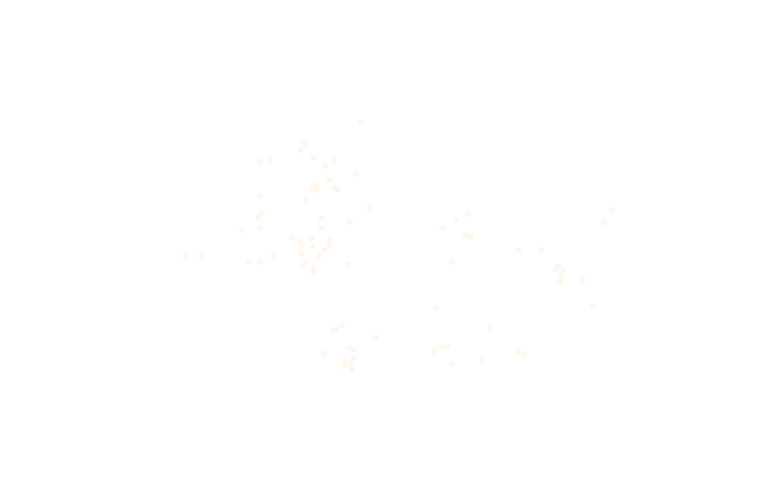

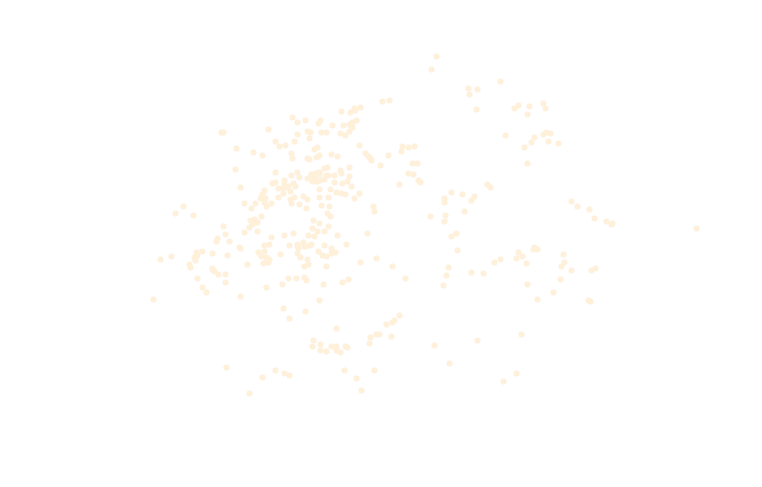

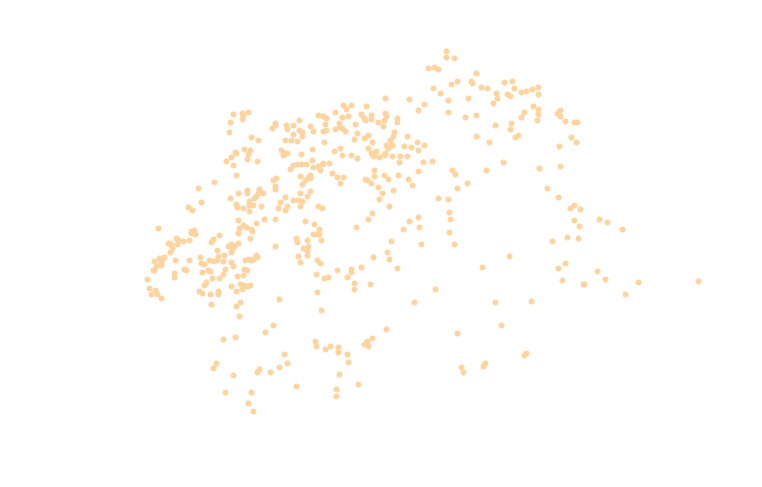

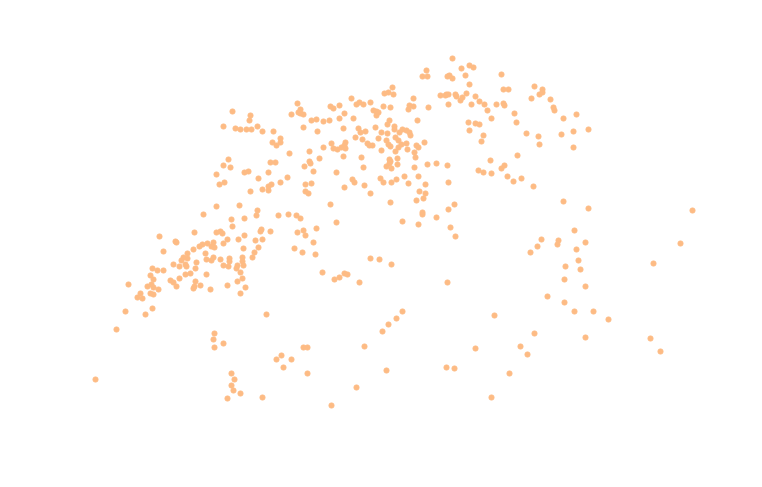

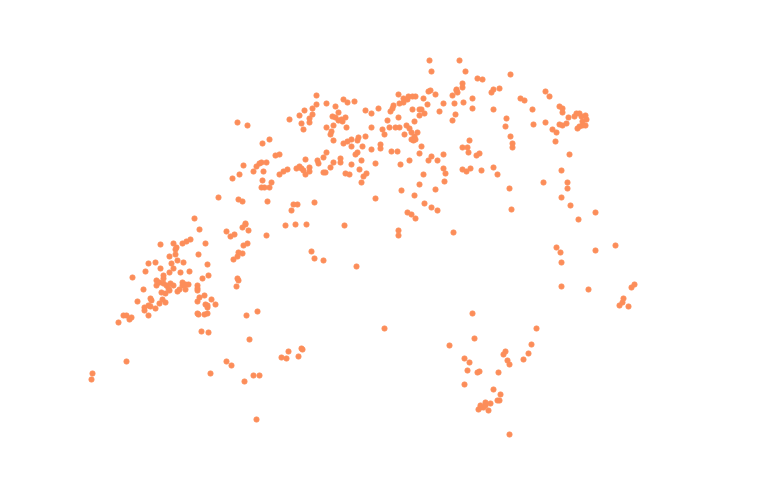

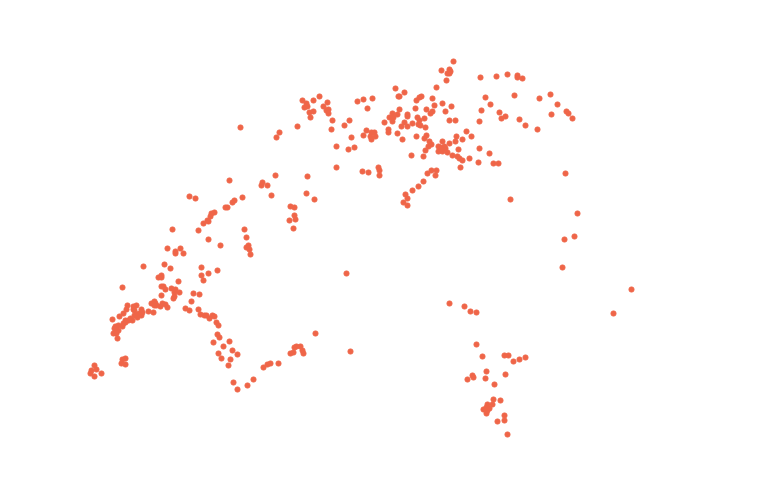

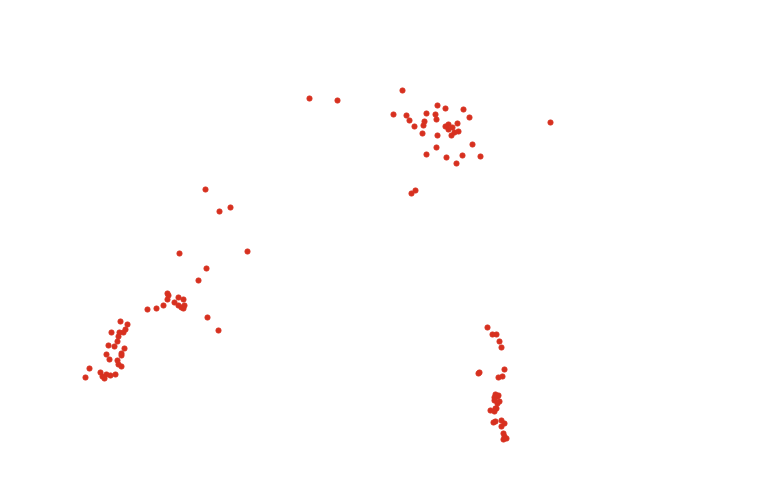

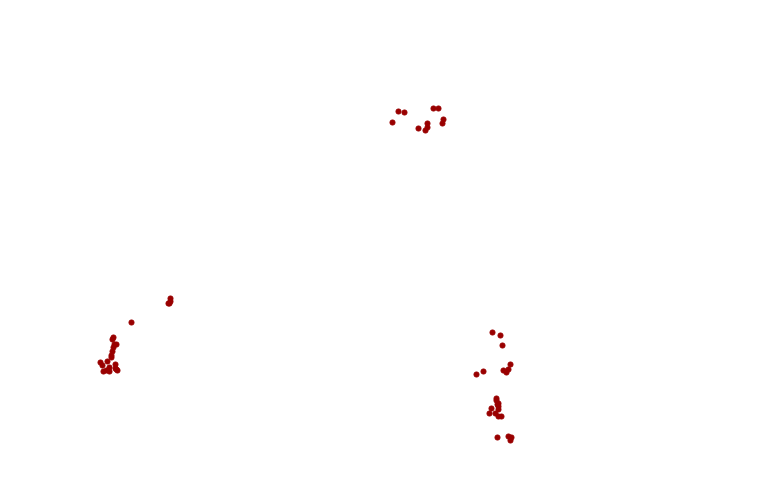

In [282]:
#We create a chart for each range that we just defined
for boundary in hist_boundaries:
    gdf_einb_capita_points_b = gdf_einb_capita_points[(gdf_einb_capita_points['Total'] >= boundary['low']) & (gdf_einb_capita_points['Total'] < boundary['high'])]
    ax = gdf_cantons.plot(edgecolor='white', alpha=0, figsize=(13,8))
    gdf_einb_capita_points_b.plot(color=boundary['color'], markersize=5, ax=ax)
    ax.set_facecolor('grey')
    ax.axis('off')
    ax.set_title('Communities with ratios between ' + str(boundary['low']) + ' and ' + str(boundary['high']) + ' percent.', fontsize=20, color='white')
    path = 'web/img/map/map' + str(boundary['low']) + '.png'
    plt.savefig(path, transparent=True)

# (Unused material)

/usr/local/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/usr/local/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


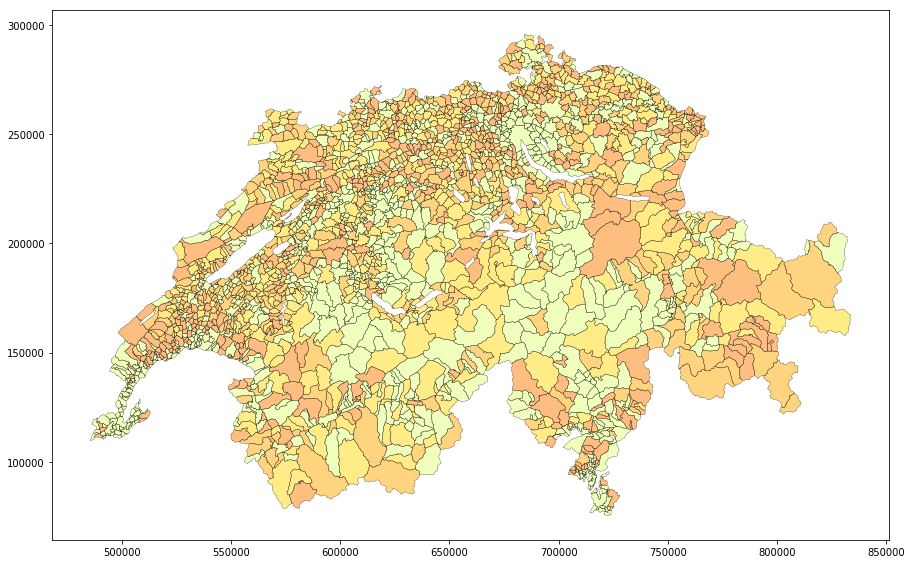

In [79]:
## A geographical image of the per capita number of handed out citizenhships btw 1981 and 2015
## Here we have a more nuanced picture. Big cities do not necessarily give more citizenships
gdf_einb_capita.plot(column='Total', scheme='quantiles', cmap='Wistia', figsize=(15,10), linewidth=0.25)

## 100 Communes who gave the most citizenships (compared to their size)

In [103]:
#Over the last 25 years, Vernier grew by cumulated 30% due to naturalizations!
df_einb_capita_top = df_einb_capita.sort_values('Total', ascending=False).head(100)
df_einb_capita_top[['Gemeinde_ID', 'Gemeinde_Name', 'Kanton_ABK', 'Total']]

,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Total
2264,6643,Vernier,GE,0.326762
1673,5186,Grancia,TI,0.310730
2251,6630,Meyrin,GE,0.302140
1691,5210,Paradiso,TI,0.279402
2244,6623,Le Grand-Saconnex,GE,0.274316
1990,5705,Bogis-Bossey,VD,0.268914
2252,6631,Onex,GE,0.263647
1716,5266,Stabio,TI,0.258999
1710,5250,Chiasso,TI,0.258499
2249,6628,Lancy,GE,0.257733


In [104]:
#Looking at Vernier
df_einb[df_einb['Gemeinde_ID'] == 6643]

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average,Change
2264,259,142,147,160,193,163,215,168,181,119,106,131,99,161,183,238,183,230,211,438,445,309,448,400,488,737,605,396,375,352,315,242,162,184,552,6643,Vernier,GE,2500,Cant. de Genève,25,Genf,9737,278.2,1.131274


In [105]:
df_bev[df_bev['Gemeinde_ID'] == 6643]

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average,Change
2264,27535.0,27548.0,27749.0,27725.0,27804.0,27622.0,27426.0,27590.0,28205.0,28104.0,28187.0,28089.0,27762.0,27769.0,28312.0,28423.0,28597.0,28438.0,28519.0,28607.0,28602.0,29204.0,29371.0,29794.0,29930.0,30020.0,30606.0,31160.0,31756.0,32374.0,32844.0,33237.0,33744.0,34235.0,34477.0,6643,Vernier,GE,2500,Cant. de Genève,25,Genf,1031365.0,29467.571429,0.252115


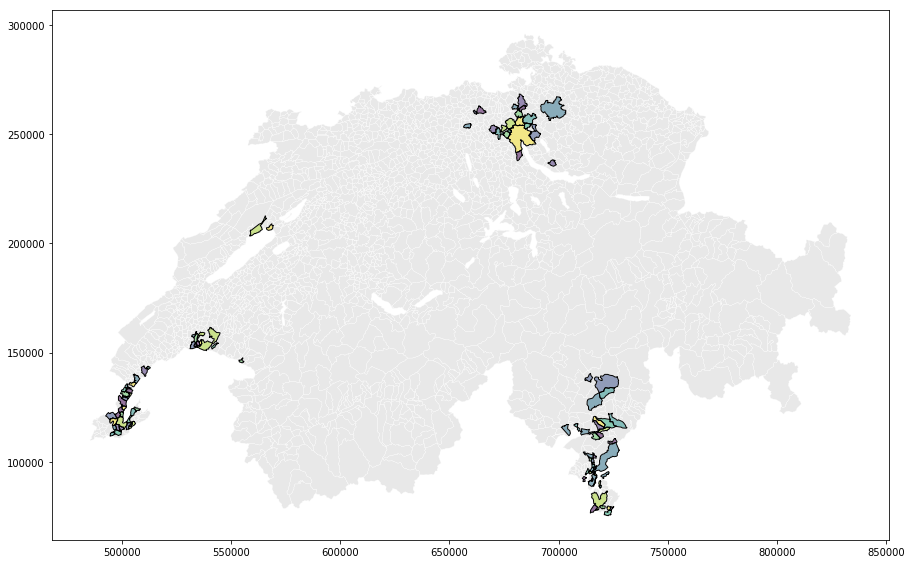

In [106]:
#Where are these communes? They are clustered in three areas around lake Geneva, Zurich and Ticino
gdf_einb_capita_top = gdf.merge(df_einb_capita_top, how='inner', left_on='GMDNR', right_on='Gemeinde_ID')
ax = gdf.plot(figsize=(15,10), color='lightgrey', linewidth=0.25, edgecolor='white')
gdf_einb_capita_top.plot(ax=ax)

## 100 big communes (over 5000 people) with the least new citizenships

In [107]:
#Frutigen (BE) only grew by 3% in size due to naturalizations!
df_bev_minbev = df_bev[df_bev['2015'] >= 5000][['Gemeinde_ID']]
df_einb_capita_minbev = df_einb_capita.merge(df_bev_minbev, how='inner', on='Gemeinde_ID')
df_einb_capita_minbev = df_einb_capita_minbev.sort_values('Total').head(100)
df_einb_capita_minbev

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Bezirk_ID,Bezirk_Name,Kanton_ID,Kanton_Name,Total,Average,Change
99,0.000869,0.000693,0.000171,0.000511,0.000169,0.000331,0.000164,0.001143,0.000163,0.000491,0.000157,0.000473,0.000771,0.000458,0.000454,0.000151,0.000303,0.000000,0.000744,0.001041,0.000298,0.003721,0.001045,0.001196,0.000903,0.002391,0.000748,0.001941,0.002394,0.001045,0.000893,0.001341,0.001195,0.001635,0.000736,563,Frutigen,BE,249,Frutigen-Niedersimmental,2,Bern,0.030739,0.000878,-0.152952
136,0.000000,0.000239,0.000697,0.000923,0.000699,0.000927,0.000921,0.000463,0.000457,0.000662,0.000420,0.000207,0.000000,0.000591,0.000409,0.000403,0.000198,0.001582,0.000391,0.000782,0.000390,0.000960,0.002093,0.002098,0.000191,0.000000,0.002042,0.000000,0.001276,0.002176,0.003393,0.001755,0.001552,0.002019,0.000500,1404,Kerns,OW,600,Kt. Obwalden,6,Obwalden,0.031416,0.000898,NaN
117,0.000000,0.001232,0.000205,0.000809,0.000202,0.000000,0.000196,0.000385,0.000768,0.000000,0.000000,0.000526,0.000342,0.000338,0.000000,0.000493,0.001634,0.000321,0.000160,0.001432,0.002068,0.001587,0.002049,0.002201,0.002192,0.000000,0.000471,0.002186,0.002167,0.004132,0.002124,0.002736,0.001808,0.001626,0.000881,1098,Ruswil,LU,314,Sursee,3,Luzern,0.037272,0.001065,NaN
213,0.001613,0.001779,0.000162,0.000483,0.000475,0.000157,0.000627,0.000313,0.000937,0.000777,0.000148,0.001152,0.000851,0.000562,0.000000,0.000000,0.000270,0.000406,0.001074,0.000534,0.001863,0.001976,0.000524,0.001176,0.002862,0.002437,0.002687,0.002776,0.000747,0.001233,0.001924,0.001676,0.001777,0.001992,0.001854,3254,Oberriet (SG),SG,1723,Rheintal,17,St. Gallen,0.039823,0.001138,0.149664
92,0.000910,0.001445,0.000898,0.000533,0.001400,0.000688,0.000685,0.000682,0.000847,0.000505,0.000000,0.000962,0.000000,0.000157,0.000156,0.000309,0.000307,0.000152,0.000759,0.001357,0.001352,0.001780,0.004732,0.003700,0.001621,0.003980,0.001488,0.001793,0.001347,0.000596,0.001798,0.000447,0.001919,0.000736,0.000443,855,Schwarzenburg,BE,246,Bern-Mittelland,2,Bern,0.040485,0.001157,-0.513911
97,0.000441,0.000433,0.001062,0.000814,0.000596,0.001176,0.000775,0.000572,0.000378,0.000568,0.000185,0.001832,0.000183,0.000547,0.000733,0.000359,0.000179,0.000177,0.000176,0.001403,0.000703,0.002271,0.002641,0.004197,0.001384,0.003062,0.003558,0.003048,0.001340,0.000675,0.001171,0.001009,0.001854,0.001341,0.000832,944,Uetendorf,BE,247,Thun,2,Bern,0.041674,0.001191,0.888316
329,0.000458,0.001127,0.001754,0.000214,0.001060,0.000422,0.001457,0.001239,0.000816,0.000000,0.000585,0.000382,0.001694,0.001122,0.000740,0.000555,0.000901,0.001277,0.000553,0.000371,0.001099,0.000549,0.001091,0.000721,0.000896,0.001244,0.000530,0.001726,0.000682,0.000336,0.006674,0.001328,0.003830,0.003267,0.001607,6024,Nendaz,VS,2302,Conthey,23,Wallis,0.042309,0.001209,2.507475
89,0.000925,0.000000,0.000000,0.000231,0.000000,0.000228,0.000000,0.000447,0.000220,0.000000,0.000432,0.000650,0.002604,0.000000,0.000223,0.000665,0.000895,0.000000,0.000441,0.000221,0.001310,0.005435,0.003930,0.003443,0.002571,0.005499,0.000632,0.003577,0.000844,0.000634,0.002729,0.001461,0.001425,0.000609,0.000791,612,Konolfingen,BE,246,Bern-Mittelland,2,Bern,0.043075,0.001231,-0.144836
81,0.000745,0.001457,0.000481,0.000241,0.000481,0.000476,0.001188,0.001892,0.000474,0.000000,0.000247,0.000735,0.000000,0.001170,0.000698,0.000463,0.000688,0.001378,0.000916,0.000224,0.000444,0.002656,0.003039,0.001276,0.002977,0.003823,0.002346,0.002138,0.002151,0.001284,0.001519,0.001705,0.002079,0.001002,0.001576,359,Vechigen,BE,246,Bern-Mittelland,2,Bern,0.043970,0.001256,1.115993
124,0.001450,0.000826,0.001859,0.000308,0.000306,0.000711,0.000802,0.000794,0.001176,0.000675,0.000557,0.000274,0.000715,0.000264,0.000522,0.000770,0.000338,0.000500,0.000735,0.000891,0.001201,0.000943,0.000467,0.000461,0.000612,0.00

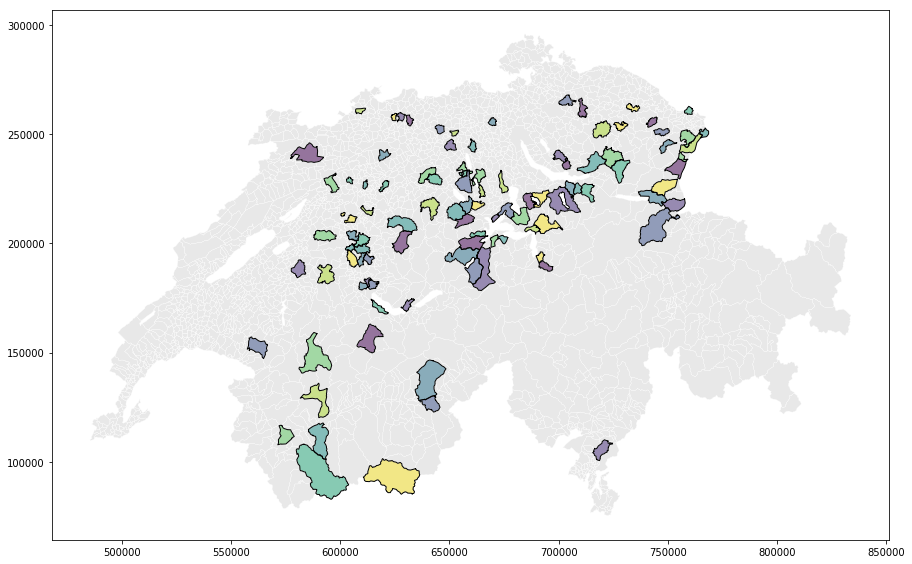

In [108]:
#Where are these communes located? Scttered all over the place, it seems
gdf_einb_capita_minbev = gdf.merge(df_einb_capita_minbev, how='inner', left_on='GMDNR', right_on='Gemeinde_ID')
ax = gdf.plot(figsize=(15,10), color='lightgrey', linewidth=0.25, edgecolor='white')
gdf_einb_capita_minbev.plot(ax=ax)

## Communes who handed out zero citizenships

In [35]:
df_zero_einb = df_einb[df_einb['Total'] == 0][['Gemeinde_ID', 'Gemeinde_Name', 'Kanton_ABK', 'Total', 'Average', 'Change']]
df_zero_einb

,Gemeinde_ID,Gemeinde_Name,Kanton_ABK,Total,Average,Change
198,707,Saules (BE),BE,0,0.0,NaN
199,708,Schelten,BE,0,0.0,NaN
200,709,Seehof,BE,0,0.0,NaN
297,972,Berken,BE,0,0.0,NaN
332,416,Mötschwil,BE,0,0.0,NaN
335,419,Oberösch,BE,0,0.0,NaN
337,421,Rumendingen,BE,0,0.0,NaN
413,661,Clavaleyres,BE,0,0.0,NaN
436,875,Mühledorf (BE),BE,0,0.0,NaN
651,1369,Riemenstalden,SZ,0,0.0,NaN


In [23]:
#Where are these communes? They are in rural mountain areas
gdf_zero_einb = gdf.merge(df_zero_einb, how='inner', left_on='GMDNR', right_on='Gemeinde_ID')

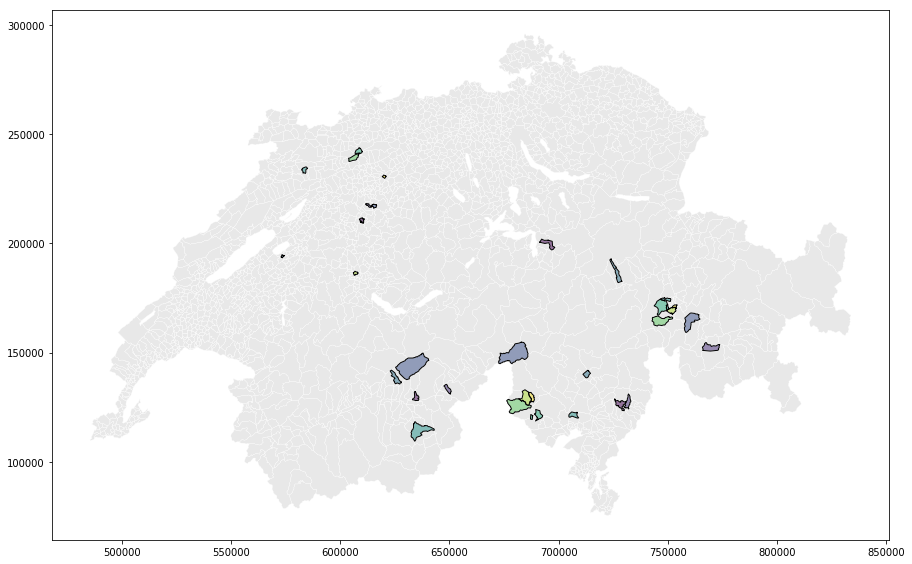

In [24]:
ax = gdf.plot(figsize=(15,10), color='lightgrey', linewidth=0.25, edgecolor='white')
gdf_zero_einb.plot(ax=ax)

In [38]:
#How many inhabitants do these communes have? --> Not many
df_zero_einb[['Gemeinde_ID', 'Gemeinde_Name']].merge(df_bev[['Gemeinde_ID','2015']], how='inner', on='Gemeinde_ID').sort_values('2015', ascending=False)

,Gemeinde_ID,Gemeinde_Name,2015
30,6197,Kippel,354.0
27,6004,Eggerberg,334.0
29,6192,Blatten,284.0
8,875,Mühledorf (BE),247.0
12,3662,Flerden,223.0
11,3538,Salouf,216.0
31,6282,Eisten,203.0
19,3611,Andiast,196.0
0,707,Saules (BE),162.0
13,3669,Tschappina,128.0


In [73]:
#How are they doing over time? Some of them are losing population
df_zerolist_bev = df_bev.merge(df_zero_einb[['Gemeinde_ID']], how='inner', on='Gemeinde_ID')

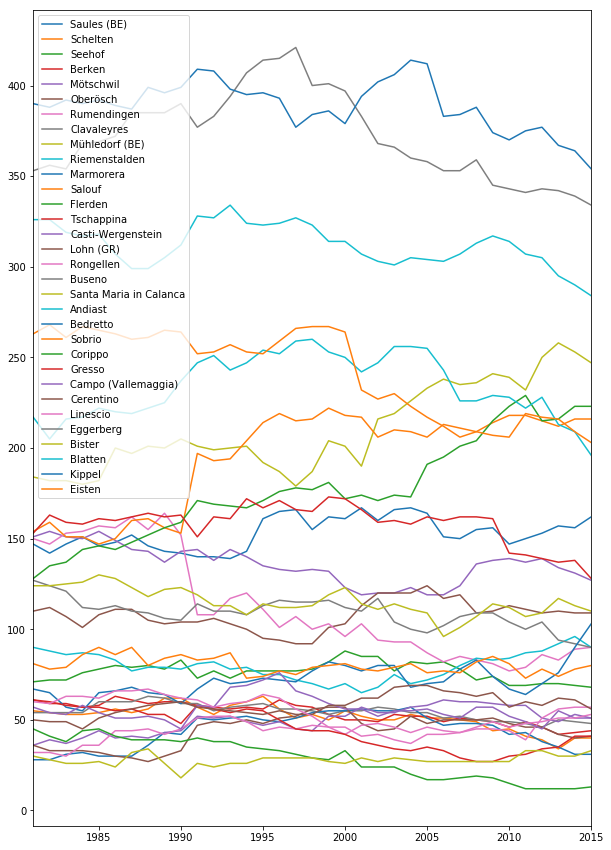

In [28]:
plot_timeseries(df_zerolist_bev, label='Gemeinde_Name', size_x=10, size_y=15)

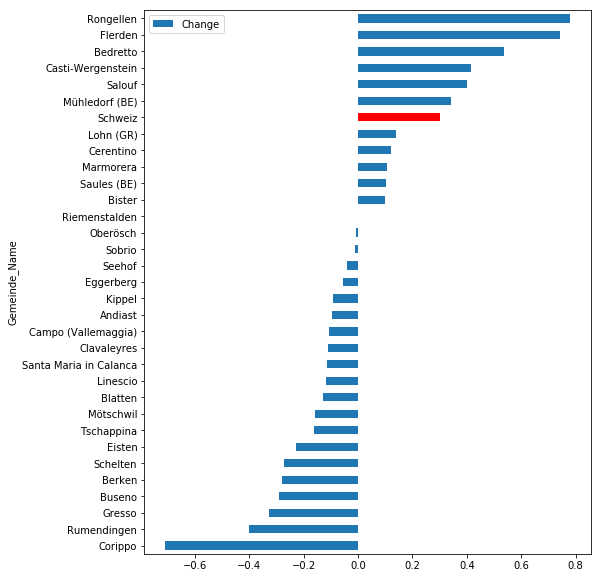

In [72]:
#Some of these communes have lost many inhabitants
ch_bev_change = df_bev[str(endyear)].sum() / df_bev[str(startyear)].sum() - 1
df_ch_bevchange = pd.DataFrame([{'Gemeinde_Name': 'Schweiz', 'Change': ch_bev_change}])
df_zerolist_bevchange = df_zerolist_bev[['Gemeinde_Name', 'Change']]
df_zerolist_bevchange = pd.concat([df_ch_bevchange, df_zerolist_bevchange], ignore_index=True)
df_zerolist_bevchange = df_zerolist_bevchange.sort_values('Change')
ax = df_zerolist_bevchange.plot(kind='barh', x='Gemeinde_Name', y='Change', figsize=(8, 10))
ax.patches[df_zerolist_bevchange.index.get_loc(0)].set_facecolor('red')